In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"nithya2811","key":"71111c8c132eff9f7d2928dd594fc3c7"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                          Spotify and Youtube                                   9MB  2023-03-20 15:43:25           9890        345  1.0              
arnabchaki/data-science-salaries-2023                          Data Science Salaries 2023  💸                        25KB  2023-04-13 09:55:16           3576         84  1.0              
erdemtaha/cancer-data                                          Cancer Data                                          49KB  2023-03-22 07:57:00           4721        102  1.0              
evangower/premier-league-2022-2023                             Pr

In [ ]:
! kaggle datasets download fedesoriano/stellar-classification-dataset-sdss17

stellar-classification-dataset-sdss17.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip stellar-classification-dataset-sdss17.zip

Archive:  stellar-classification-dataset-sdss17.zip
replace star_classification.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
pd.read_csv('/content/star_classification.csv')

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/star_classification.csv')
df.shape

(100000, 18)

In [ ]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [ ]:
n=df["class"].value_counts()
n

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [ ]:
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [ ]:
def noisefn(column, mu, sigma):
  noise = np.random.normal(mu, sigma, [100000,])
  
  df[column] = df[column]+ noise

  #df[df[column]<=0] = None

In [ ]:
df.rename(columns = {'u':'Ultraviolet', 'g':'Green','r':'Red_filter', 'i':'Near_Infrared', 'z':'Infrared'}, inplace = True)

In [ ]:
df.head()

,obj_ID,alpha,delta,Ultraviolet,Green,Red_filter,Near_Infrared,Infrared,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [ ]:
noisefn('alpha', 0, 9.6)

In [ ]:
noisefn('delta',0,1.96)
noisefn('Ultraviolet',0,3.2)
noisefn('Green',0,3.2)
noisefn('Red_filter',0,0.2)
noisefn('Near_Infrared',0,0.17)
noisefn('Infrared',0,3.2)
noisefn('redshift',0,0.07)

In [ ]:
df.isnull().sum()

obj_ID           0
alpha            0
delta            0
Ultraviolet      0
Green            0
Red_filter       0
Near_Infrared    0
Infrared         0
run_ID           0
rerun_ID         0
cam_col          0
field_ID         0
spec_obj_ID      0
class            0
redshift         0
plate            0
MJD              0
fiber_ID         0
dtype: int64

In [ ]:
last_column = df.pop('class')             
df.insert(17, 'Object_type', last_column)
df.head()

,obj_ID,alpha,delta,Ultraviolet,Green,Red_filter,Near_Infrared,Infrared,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,Object_type
0,1.237661e+18,143.195704,31.851402,24.021995,22.520169,20.340416,19.569509,17.267188,3606,301,2,79,6.543777e+18,0.551623,5812,56354,171,GALAXY
1,1.237665e+18,140.731666,29.130006,22.158193,23.971351,22.502360,21.155653,27.354515,4518,301,5,119,1.176014e+19,0.682224,10445,58158,427,GALAXY
2,1.237661e+18,144.044921,35.524092,35.039543,20.255530,20.774378,19.260898,15.950000,3606,301,2,120,5.152200e+18,0.745948,4576,55592,299,GALAXY
3,1.237663e+18,334.972112,-2.421381,19.846592,25.619157,22.052954,20.543693,20.797921,4192,301,3,214,1.030107e+19,1.069030,9149,58039,775,GALAXY
4,1.237680e+18,342.984545,18.787045,22.275059,18.329727,16.661756,16.092780,19.037962,8102,301,3,137,6.891865e+18,0.007226,6121,56187,842,GALAXY


In [ ]:
df.head()

,obj_ID,alpha,delta,Ultraviolet,Green,Red_filter,Near_Infrared,Infrared,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,Object_type
0,1.237661e+18,143.195704,31.851402,24.021995,22.520169,20.340416,19.569509,17.267188,3606,301,2,79,6.543777e+18,0.551623,5812,56354,171,GALAXY
1,1.237665e+18,140.731666,29.130006,22.158193,23.971351,22.502360,21.155653,27.354515,4518,301,5,119,1.176014e+19,0.682224,10445,58158,427,GALAXY
2,1.237661e+18,144.044921,35.524092,35.039543,20.255530,20.774378,19.260898,15.950000,3606,301,2,120,5.152200e+18,0.745948,4576,55592,299,GALAXY
3,1.237663e+18,334.972112,-2.421381,19.846592,25.619157,22.052954,20.543693,20.797921,4192,301,3,214,1.030107e+19,1.069030,9149,58039,775,GALAXY
4,1.237680e+18,342.984545,18.787045,22.275059,18.329727,16.661756,16.092780,19.037962,8102,301,3,137,6.891865e+18,0.007226,6121,56187,842,GALAXY


In [ ]:
df.shape

(100000, 18)

In [ ]:
df['Object_type']=df['Object_type'].replace(('GALAXY', 'STAR', 'QSO'), (1,2,3))

1-Galaxy
2-Star
3-Quasars

<Axes: >

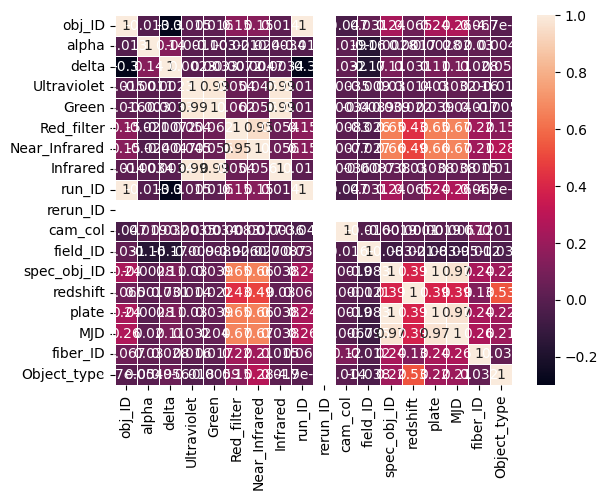

In [ ]:
sns.heatmap(df.corr(), annot=True, linewidths=.5)

In [ ]:
corr_matrix = df.corr().abs()
corr_matrix

,obj_ID,alpha,delta,Ultraviolet,Green,Red_filter,Near_Infrared,Infrared,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,Object_type
obj_ID,1.000000,0.013291,0.299221,0.015027,0.015845,0.152599,0.147015,0.013807,1.000000,NaN,0.046997,0.031498,0.239461,0.064887,0.239460,0.262687,0.067178,0.000047
alpha,0.013291,1.000000,0.137316,0.001125,0.002987,0.021347,0.023629,0.003350,0.013293,NaN,0.019338,0.164658,0.002844,0.001686,0.002844,0.019673,0.030404,0.004905
delta,0.299221,0.137316,1.000000,0.002308,0.003269,0.007179,0.004682,0.003425,0.299223,NaN,0.031830,0.172381,0.111247,0.031289,0.111247,0.106412,0.027962,0.056177
Ultraviolet,0.015027,0.001125,0.002308,1.000000,0.989265,0.053586,0.044898,0.988028,0.015027,NaN,0.003479,0.008961,0.029748,0.013853,0.029748,0.031766,0.016073,0.017625
Green,0.015845,0.002987,0.003269,0.989265,1.000000,0.061774,0.055566,0.989113,0.015845,NaN,0.003442,0.008896,0.039039,0.022450,0.039039,0.039829,0.017298,0.005914
Red_filter,0.152599,0.021347,0.007179,0.053586,0.061774,1.000000,0.952870,0.054164,0.152598,NaN,0.008346,0.026040,0.651729,0.428179,0.651727,0.667556,0.221999,0.149745
Near_Infrared,0.147015,0.023629,0.004682,0.044898,0.055566,0.952870,1.000000,0.056266,0.147013,NaN,0.007692,0.026647,0.658593,0.487580,0.658592,0.669438,0.213638,0.282966
Infrared,0.013807,0.003350,0.003425,0.988028,0.989113,0.054164,0.056266,1.000000,0.013807,NaN,0.003554,0.008721,0.038366,0.030340,0.038366,0.038005,0.014834,0.017289
run_ID,1.000000,0.013293,0.299223,0.015027,0.015845,0.152598,0.147013,0.013807,1.000000,NaN,0.047098,0.031498,0.239460,0.064887,0.239459,0.262687,0.067165,0.000049
rerun_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

<ipython-input-30-f48403b9242a>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,obj_ID,alpha,delta,Ultraviolet,Green,Red_filter,Near_Infrared,Infrared,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,Object_type
obj_ID,NaN,0.013291,0.299221,0.015027,0.015845,0.152599,0.147015,0.013807,1.000000,NaN,0.046997,0.031498,0.239461,0.064887,0.239460,0.262687,0.067178,0.000047
alpha,NaN,NaN,0.137316,0.001125,0.002987,0.021347,0.023629,0.003350,0.013293,NaN,0.019338,0.164658,0.002844,0.001686,0.002844,0.019673,0.030404,0.004905
delta,NaN,NaN,NaN,0.002308,0.003269,0.007179,0.004682,0.003425,0.299223,NaN,0.031830,0.172381,0.111247,0.031289,0.111247,0.106412,0.027962,0.056177
Ultraviolet,NaN,NaN,NaN,NaN,0.989265,0.053586,0.044898,0.988028,0.015027,NaN,0.003479,0.008961,0.029748,0.013853,0.029748,0.031766,0.016073,0.017625
Green,NaN,NaN,NaN,NaN,NaN,0.061774,0.055566,0.989113,0.015845,NaN,0.003442,0.008896,0.039039,0.022450,0.039039,0.039829,0.017298,0.005914
Red_filter,NaN,NaN,NaN,NaN,NaN,NaN,0.952870,0.054164,0.152598,NaN,0.008346,0.026040,0.651729,0.428179,0.651727,0.667556,0.221999,0.149745
Near_Infrared,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.056266,0.147013,NaN,0.007692,0.026647,0.658593,0.487580,0.658592,0.669438,0.213638,0.282966
Infrared,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013807,NaN,0.003554,0.008721,0.038366,0.030340,0.038366,0.038005,0.014834,0.017289
run_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.047098,0.031498,0.239460,0.064887,0.239459,0.262687,0.067165,0.000049
rerun_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

['Green', 'Near_Infrared', 'Infrared', 'run_ID', 'plate', 'MJD']

In [ ]:
X = df.drop(columns = ['Object_type'])
Y = df['Object_type']

In [ ]:
X

,obj_ID,alpha,delta,Ultraviolet,Green,Red_filter,Near_Infrared,Infrared,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
0,1.237661e+18,143.195704,31.851402,24.021995,22.520169,20.340416,19.569509,17.267188,3606,301,2,79,6.543777e+18,0.551623,5812,56354,171
1,1.237665e+18,140.731666,29.130006,22.158193,23.971351,22.502360,21.155653,27.354515,4518,301,5,119,1.176014e+19,0.682224,10445,58158,427
2,1.237661e+18,144.044921,35.524092,35.039543,20.255530,20.774378,19.260898,15.950000,3606,301,2,120,5.152200e+18,0.745948,4576,55592,299
3,1.237663e+18,334.972112,-2.421381,19.846592,25.619157,22.052954,20.543693,20.797921,4192,301,3,214,1.030107e+19,1.069030,9149,58039,775
4,1.237680e+18,342.984545,18.787045,22.275059,18.329727,16.661756,16.092780,19.037962,8102,301,3,137,6.891865e+18,0.007226,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,24.974360,-3.707271,21.368505,20.566670,22.111787,20.994079,20.709784,7778,301,2,581,1.055431e+19,0.021365,9374,57749,438
99996,1.237679e+18,26.856762,20.307799,19.875274,19.293629,20.596497,19.635222,20.431382,7917,301,1,289,8.586351e+18,0.372307,7626,56934,866
99997,1.237668e+18,235.430127,15.216263,23.097256,13.252454,18.177966,17.789091,14.025591,5314,301,4,308,3.112008e+18,0.234858,2764,54535,74
99998,1.237661e+18,214.129981,47.491843,25.343590,21.544215,19.787521,18.855937,11.394991,3650,301,4,131,7.601080e+18,0.424915,6751,56368,470


In [ ]:
Y

0        1
1        1
2        1
3        1
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: Object_type, Length: 100000, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
def model(y_test,y_pred):
    print(f"Accuracy score: {accuracy_score(y_test,y_pred)}")
    print(f"Confusion matrix: {confusion_matrix(y_test,y_pred)}")
    print(f"Classification report: {classification_report(y_test,y_pred)}")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(x_train,y_train)
y1_pred = knn.predict(x_test)
model(y_test,y1_pred)

Accuracy score: 0.7003030303030303
Confusion matrix: [[17467   863  1295]
 [ 2879  3486   724]
 [ 3414   715  2157]]
Classification report:               precision    recall  f1-score   support

           1       0.74      0.89      0.81     19625
           2       0.69      0.49      0.57      7089
           3       0.52      0.34      0.41      6286

    accuracy                           0.70     33000
   macro avg       0.65      0.57      0.60     33000
weighted avg       0.68      0.70      0.68     33000



In [ ]:
x_test.shape

(33000, 17)

In [ ]:
x_train.shape

(67000, 17)

In [ ]:
x_test.index = np.arange(0, 33000)
x_train.index = np.arange(0, 67000)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
x_test.to_csv('/content/drive/MyDrive/ENIGMA/test.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
x_train.to_csv('/content/drive/MyDrive/ENIGMA/train.csv', index=False)

In [ ]:
y_test.shape

(33000,)

In [ ]:
y_test.index = np.arange(0, 33000)

In [ ]:
y_test.head

<bound method NDFrame.head of 0        1
1        2
2        2
3        2
4        2
        ..
32995    1
32996    2
32997    1
32998    2
32999    1
Name: Object_type, Length: 33000, dtype: int64>

In [ ]:
y_test.to_csv('/content/drive/MyDrive/ENIGMA/sol.csv', index=True)

In [64]:
submission=Y[10000:43000]

In [65]:
submission.shape

(33000,)

In [66]:
submission.index = np.arange(0, 33000)

In [67]:
submission

0        2
1        3
2        2
3        2
4        3
        ..
32995    1
32996    1
32997    1
32998    1
32999    1
Name: Object_type, Length: 33000, dtype: int64

In [68]:
submission.to_csv('/content/drive/MyDrive/ENIGMA/submission.csv', index=True)